## Analyzing the FIFA19 data..

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

## 1) Business Understanding

As a diehard supporter and fan of football and most especially the English Premiere League(EPL), exploring FIFA19 dataset will be much fun for me. From this dataset, I want to understand the following:

*1)* *Which of the top six clubs in EPL for 2018/2019 season had the youngest players? Which of these clubs had the youngest squad in terms of average age?*

*2)* * Who are the first six players with the best wage/potential for the top six clubs in EPL for the 2018/2019 season? Which of these players deserve to earn more than some others based on their overall potential? *

*3)* * How does a player's skill set influence his potential? Can we predict a player's potential based on his skills' set?*

## 2) Data Understanding

#### Gather data

In [2]:
df = pd.read_csv('data.csv') # read the dataset and store in 'df'
df.head(5) #display first five rows of the dataset 

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Access

In [3]:
num_rows = df.shape[0] # number of rows is equivalent to number of players 
num_columns = df.shape[1]
print('There are {} players and {} attributes'.format(num_rows,num_columns))

There are 18207 players and 89 attributes


In [4]:
# attributes for each player entry
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

**Missing values in each column**

In [5]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## 3)  Data Preparation

#### Clean

Here we are going to clean our dataset. We are going to:
1)drop any unwanted column 
2)convert categorical values to numerical values
3)handle missing values

In [6]:
# Drop unused columns
drop_columns = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

df.drop(drop_columns , axis=1, inplace=True)
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,4.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,2280,4.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,5.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,2201,4.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,1331,3.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


In [7]:
#Finding missing values
print(df.isnull().sum())

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Position                     60
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility                      48
Reactions                    48
Balance                      48
ShotPower                    48
Jumping                      48
Stamina 

It can be seen from above that some columns related to players' skills have 48 missing values. This implies that there are 48 players which these values are missing. 

In [8]:
# Convert value/wage string to number
# Example: €110.5M -> 110.5 * 1000000
def str2num(value):
    """
    This function convert amount string to float 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if value[-1] == 'M':
        return float(value[1:-1])*1000000
    elif value[-1] == 'K':
        return float(value[1:-1])*1000
    else:
        return float(value[1:])

In [9]:
# Convert value, wage to number
# First convert value, wage string to actual amount, then divide by 1 million and 1 k. 
df['Value_M'] = df['Value'].apply(lambda x: str2num(x) / 1000000)
df['Wage_K'] = df['Wage'].apply(lambda x: str2num(x) / 1000)

# Drop original value & wage column
df.drop(['Value', 'Wage'], axis=1, inplace=True)

In [10]:
# From below we can see that highest player value is 118.8m and wage is 565k
# Which are Neymar Jr and L. Messi respectively.
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,2.410696,9.731312
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,5.594933,21.999290
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,118.500000,565.000000


## 4) Answer Questions

#### Analyze

#### Q1): Which of the top six clubs in EPL for 2018/2019 season had the youngest  players? Which of these clubs had the youngest squad in terms of average age?

In [11]:
PL_clubs = ['Manchester City','Manchester United', 'Liverpool','Tottenham Hotspur','Arsenal', 'Chelsea']

top_six_PL_clubs = df.loc[df['Club'].isin(PL_clubs)]

print(top_six_PL_clubs)

                      Name  Age  Nationality  Overall  Potential  \
3                   De Gea   27        Spain       91         93   
4             K. De Bruyne   27      Belgium       91         92   
5                E. Hazard   27      Belgium       91         91   
13             David Silva   32        Spain       90         90   
14                N. Kanté   27       France       89         90   
16                 H. Kane   24      England       89         91   
23               S. Agüero   30    Argentina       89         89   
26                M. Salah   26        Egypt       88         89   
31              C. Eriksen   26      Denmark       88         91   
33           P. Aubameyang   29        Gabon       88         88   
37               H. Lloris   31       France       88         88   
45                P. Pogba   25       France       87         91   
47               R. Lukaku   25      Belgium       87         89   
51           J. Vertonghen   31      Belgium    

In [12]:
club_grouped = top_six_PL_clubs.groupby('Club').mean()
club_grouped

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
Club,,,,,,,,,,,,,,,,,,,,,
Arsenal,24.606061,75.181818,81.393939,1770.060606,2.030303,2.969697,2.757576,57.727273,49.363636,56.939394,...,54.787879,57.090909,55.666667,15.848485,16.121212,15.909091,15.939394,15.606061,13.211818,78.424242
Chelsea,25.212121,76.787879,82.636364,1810.484848,2.121212,3.333333,2.787879,59.484848,53.212121,58.090909,...,54.363636,55.666667,53.393939,17.484848,17.303030,16.303030,16.969697,17.878788,18.388333,98.454545
Liverpool,24.000000,76.000000,82.393939,1834.909091,1.969697,3.060606,3.030303,61.545455,56.363636,57.939394,...,51.121212,55.909091,52.969697,15.787879,16.909091,15.727273,14.666667,16.000000,17.728939,87.939394
Manchester City,23.909091,76.727273,83.909091,1836.878788,2.090909,3.151515,2.787879,59.696970,52.303030,56.121212,...,57.515152,55.727273,51.484848,17.939394,17.272727,17.515152,17.484848,16.969697,23.835000,113.363636
Manchester United,24.757576,77.242424,82.666667,1882.333333,2.090909,3.212121,3.030303,62.242424,56.424242,62.303030,...,56.696970,58.000000,54.909091,16.575758,16.515152,17.060606,16.272727,17.121212,17.843939,102.757576
Tottenham Hotspur,24.606061,76.696970,82.060606,1831.060606,2.000000,3.060606,2.787879,58.636364,54.363636,59.151515,...,56.969697,55.878788,52.575758,17.818182,17.545455,17.060606,18.393939,18.636364,18.740909,79.484848


#### Visualize

In [33]:
# function to make plot
def makePlot(column, color, title, xlabel, ylabel):
    """
    This function takes in common paramters and produces a plot 
    
    Parameter:
    column(str): name of column from the dataframe
    color(str): choice of plot color
    title(str): title of the chart
    xlabel(str): x-axis title
    ylabel(str): y-axis title

    """
    club_grouped.sort_values(column, ascending = False, inplace = True)
    club_grouped[column].head(10).plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

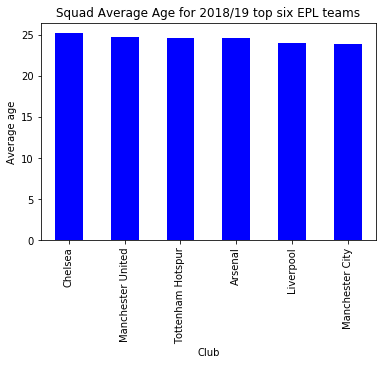

In [34]:
makePlot('Age', 'Blue', 'Squad Average Age for 2018/19 top six EPL teams', 'Club', 'Average age' )

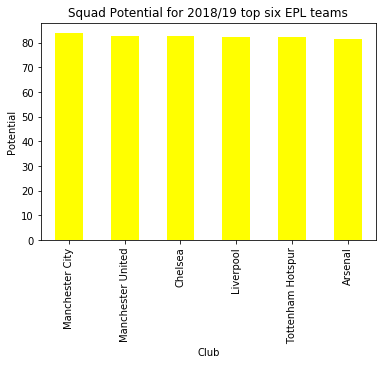

In [35]:
makePlot('Potential', 'Yellow', 'Squad Potential for 2018/19 top six EPL teams', 'Club', 'Potential')

From the plots and result above, it can be seen that for the top six EPL teams in the 2018/19 season, Manchester City had the youngest squad with an average age of 23 years and the squad with the most potential. These contributed to why they won the EPL that season.

#### Q2): Who are the first six players with the best wage/potential for the top six clubs in EPL for the 2018/2019 season? Which of these  players deserve to earn more than some others based on their overall potential?

In [15]:
top_six_PL_clubs['Wage/Potential'] = top_six_PL_clubs['Wage_K']/top_six_PL_clubs['Potential']  
top_six_PL_clubs.sort_values('Wage/Potential', ascending=False, inplace=True);
top_six_PL_clubs.head(6);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


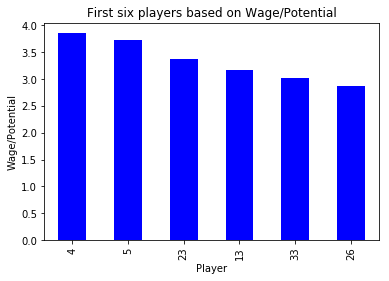

In [16]:
top_six_PL_clubs['Wage/Potential'].head(6).plot(kind='bar', color='Blue');
plt.title('First six players based on Wage/Potential')
plt.xlabel('Player')
plt.ylabel('Wage/Potential');

As can be seen from the results of the plot and table above,(4) *K. De Bruyne* had the best Wage/Potential ratio with two of his fellow team mates in the persons of (23) *S. Agüero* and (13) *David Silva* coming third and fourth respectively.(5) *E. Hazard* came in second while (33) *Aubameyang* and (26) *M Salah* came in fifth and sixth respectively.  It can be seen that *David Silva* with a greater potential than *S. Agüero* is earning lower wages than the latter in Manchester City. Maybe he(David Silva) could get an increase in his wages, at least upto what *S. Agüero* earns.

#### Q3): How does a player's skill set influence his potential? Can we predict a player's potential based on his skills' set? 

In [17]:
# Here again, I drop unused columns so far
columns_to_drop = ['Name', 'Nationality', 'Club']
df.drop(columns_to_drop, axis=1, inplace=True)


In [18]:
# I chose to Drop the 48 players whose skill set is missing since they wouldnt play a major role in my analysis as
#they lack the major values of interest
df.dropna(axis=0, how='any', inplace=True)

In [19]:
# Work Rate is in the format of attack work rate/defence work rate
# so need to create two new columns here.
df['Work Rate Attack'] = df['Work Rate'].map(lambda x: x.split('/')[0])
df['Work Rate Defence'] = df['Work Rate'].map(lambda x: x.split('/')[1])
df.drop('Work Rate', axis=1, inplace=True)

In [20]:
df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2202,5.0,4.0,4.0,RF,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0,Medium,Medium
1,33,94,94,2228,5.0,4.0,5.0,ST,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0,High,Low
2,26,92,93,2143,5.0,5.0,5.0,LW,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0,High,Medium
3,27,91,93,1471,4.0,3.0,1.0,GK,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0,Medium,Medium
4,27,91,92,2281,4.0,5.0,4.0,RCM,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0,High,High


In [21]:
# One Hot Encoding for Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
df = pd.get_dummies(df, columns=one_hot_columns, prefix = one_hot_columns)

In [22]:
df.shape

(18147, 76)

## 5) Modeling

##### Let's predict a player's potential based on his skills' set by training a model and evaluating its performance

In [23]:
y = df['Potential']
X = df.drop(['Value_M', 'Wage_K', 'Potential', 'Overall'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Using random forest classifier
Classifier = RandomForestRegressor(n_estimators=500)
Classifier.fit(X_train, y_train)
y_test_preds = Classifier.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.871238109644
4.92061905234


In [26]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = Classifier.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(20)

,Features,Coefs
14,BallControl,0.265914
18,Reactions,0.200627
0,Age,0.179064
32,StandingTackle,0.067092
38,GKReflexes,0.025378
34,GKDiving,0.023448
1,Special,0.018890
7,HeadingAccuracy,0.016751
26,Interceptions,0.015591
31,Marking,0.014982


## 6) Evaluation

From the results, it can be deduced that young players with fast reactions and excellent ball controls tend to perform excellently. This again justifies our result of *Q1* as to why *Manchester City* with the youngest squad in that season of the premiere league won the title.

Ball control,reactions and age are indeed the three main features that decides a player's potential.

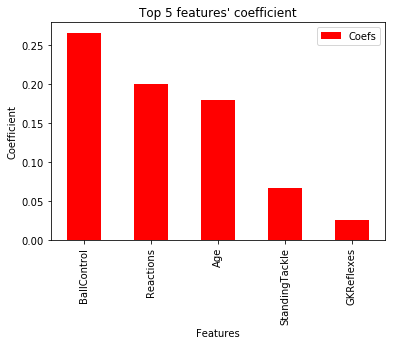

In [27]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='red');
plt.title("Top 5 features' coefficient")
plt.xlabel('Features')
plt.ylabel('Coefficient')